## Preparación del dataset
*   Exlporar el dataset 
*   Manejo de nulos 
* Aplicar Reduccion de técnicas de dimensionalidad
* Separar el dataset de prueba

1. Explorar el Dataset

In [1]:
#importar las librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [2]:
# 1. Preparación del dataset
dataset_path = r"C:\Users\jquinteros\OneDrive - Esri NOSA\Joffre Quinteros\Maestria\Modelos y aprendizajes\Clase 2\DeberSemana2\uci_malware_detection.csv"
df = pd.read_csv(dataset_path)

In [3]:
# Visualización de las primeras filas del dataset
print(df.head())

           Label  F_1  F_2  F_3  F_4  F_5  F_6  F_7  F_8  F_9  ...  F_522  \
0  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
1  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
2  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
3  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   
4  non-malicious    1    0    1    0    1    0    1    0    1  ...      0   

   F_523  F_524  F_525  F_526  F_527  F_528  F_529  F_530  F_531  
0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0  

[5 rows x 532 columns]


In [4]:
# Verificación de la distribución de etiquetas
print(df['Label'].value_counts())

Label
malicious        301
non-malicious     72
Name: count, dtype: int64


In [5]:
# Estadísticas descriptivas de las características
print(df.describe())

              F_1    F_2         F_3         F_4         F_5    F_6  \
count  373.000000  373.0  373.000000  373.000000  373.000000  373.0   
mean     0.997319    0.0    0.994638    0.002681    0.994638    0.0   
std      0.051778    0.0    0.073127    0.051778    0.073127    0.0   
min      0.000000    0.0    0.000000    0.000000    0.000000    0.0   
25%      1.000000    0.0    1.000000    0.000000    1.000000    0.0   
50%      1.000000    0.0    1.000000    0.000000    1.000000    0.0   
75%      1.000000    0.0    1.000000    0.000000    1.000000    0.0   
max      1.000000    0.0    1.000000    1.000000    1.000000    0.0   

              F_7    F_8         F_9   F_10  ...      F_522       F_523  \
count  373.000000  373.0  373.000000  373.0  ...  373.00000  373.000000   
mean     0.994638    0.0    0.994638    0.0  ...    0.10992    0.107239   
std      0.073127    0.0    0.073127    0.0  ...    0.31321    0.309832   
min      0.000000    0.0    0.000000    0.0  ...    0.00000 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Columns: 532 entries, Label to F_531
dtypes: int64(531), object(1)
memory usage: 1.5+ MB


2. Manejo de nulos

In [7]:
null_values = df.isnull().sum()
print("Valores nulos por columna:")
print(null_values)

Valores nulos por columna:
Label    0
F_1      0
F_2      0
F_3      0
F_4      0
        ..
F_527    0
F_528    0
F_529    0
F_530    0
F_531    0
Length: 532, dtype: int64


In [8]:
# etiquetas a binario
df['Label'] = df['Label'].map({'non-malicious': 0, 'malicious': 1})

In [9]:
# Separación del dataset en características (X) y etiquetas (y)
X = df.drop('Label', axis=1)
y = df['Label']

In [10]:
X.head()

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

3. Separacion muestras de prueba y entrenamiento

In [12]:
# División del dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.4, random_state=42)

4. Reducción de dimensionalidad

In [13]:
#balanceo SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [14]:
# normalizacion
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Seleccion de técnicas de aprendizaje profundo ( GBC)

In [27]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [16]:
#Gradiente Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=5, learning_rate=0.1, random_state=42)
gbm.fit(X_train_bal, y_train_bal) #Fit es para ajustar el modelo 
#Se realiza con el reducido y el y train, solo se reduce en X no en Y.


GradientBoostingClassifier(n_estimators=5, random_state=42)

In [17]:
# Predecir en el conjunto de entrenamiento
y_pred = gbm.predict(X_train_bal)

# Evaluar el modelo
accuracy = accuracy_score(y_train_bal, y_pred)
report = classification_report(y_train_bal, y_pred)

print("Gradient Boosting Machines Model Evaluation on training Set:")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}\n")

Gradient Boosting Machines Model Evaluation on Test Set:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       212

    accuracy                           1.00       424
   macro avg       1.00      1.00      1.00       424
weighted avg       1.00      1.00      1.00       424




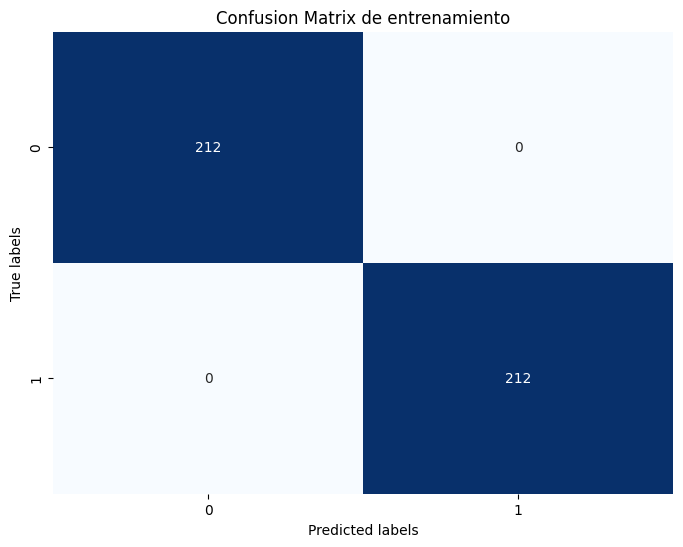

In [18]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_train_bal, y_pred)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix de entrenamiento')
plt.show()

In [26]:
# Predecir en el conjunto de entrenamiento
y_pred = gbm.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Gradient Boosting Machines Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}\n")

Gradient Boosting Machines Model Evaluation on Test Set:
Accuracy: 0.9555555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.94      0.97        34

    accuracy                           0.96        45
   macro avg       0.92      0.97      0.94        45
weighted avg       0.96      0.96      0.96        45




In [28]:
#del rendimiento del modelo, como calcular la precisión, la sensibilidad y la especificidad para cada clase
# Calcular métricas para cada clase
precision = precision_score(y_test, y_pred, average=None)
sensibilidad = recall_score(y_test, y_pred, average=None)

# Calcular la precisión global (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Mostrar resultados
for i in range(len(precision)):
    print(f'Clase {i}:')
    print(f'  Precisión: {precision[i]:.4f}')
    print(f'  Sensibilidad: {sensibilidad[i]:.4f}')
    print()

print(f'Precisión Global (Accuracy): {accuracy:.4f}')

Clase 0:
  Precisión: 0.8462
  Sensibilidad: 1.0000

Clase 1:
  Precisión: 1.0000
  Sensibilidad: 0.9412

Precisión Global (Accuracy): 0.9556


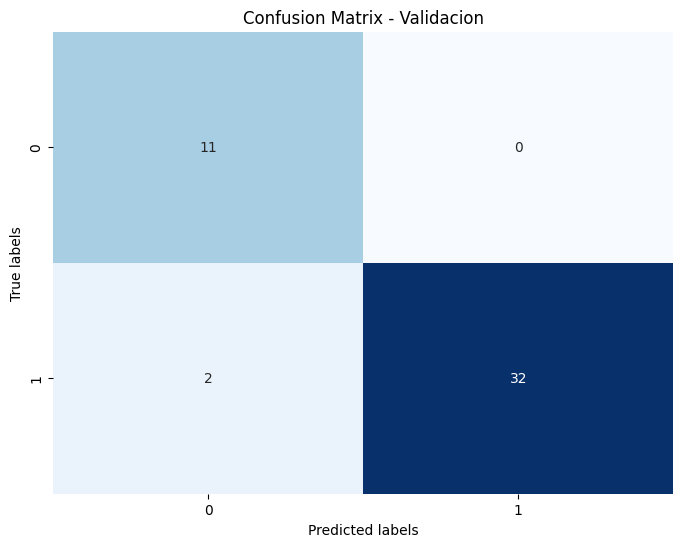

In [20]:
# Predecir en el conjunto de prueba
y_test_pred = gbm.predict(X_test)

# Calcular la matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_test, y_test_pred)

# Mostrar la matriz de confusión como un mapa de calor para el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Validacion')
plt.show()


# La matriz con la validación

In [21]:
# Predecir en el conjunto de validación
y_pred_val = gbm.predict(X_val)

# Evaluar el modelo
accuracy = accuracy_score(y_val, y_pred_val)
report = classification_report(y_val, y_pred_val)

print("Gradient Boosting Machines Model Evaluation on Validation Set:")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}\n")

Gradient Boosting Machines Model Evaluation on Validation Set:
Accuracy: 0.9552238805970149
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.98      0.96      0.97        55

    accuracy                           0.96        67
   macro avg       0.91      0.94      0.93        67
weighted avg       0.96      0.96      0.96        67




In [29]:
#del rendimiento del modelo, como calcular la precisión, la sensibilidad y la especificidad para cada clase
# Calcular métricas para cada clase
precision = precision_score(y_val, y_pred_val, average=None)
sensibilidad = recall_score(y_val, y_pred_val, average=None)

# Calcular la precisión global (accuracy)
accuracy = accuracy_score(y_val, y_pred_val)

# Mostrar resultados
for i in range(len(precision)):
    print(f'Clase {i}:')
    print(f'  Precisión: {precision[i]:.4f}')
    print(f'  Sensibilidad: {sensibilidad[i]:.4f}')
    print()

print(f'Precisión Global (Accuracy): {accuracy:.4f}')

Clase 0:
  Precisión: 0.8462
  Sensibilidad: 0.9167

Clase 1:
  Precisión: 0.9815
  Sensibilidad: 0.9636

Precisión Global (Accuracy): 0.9552


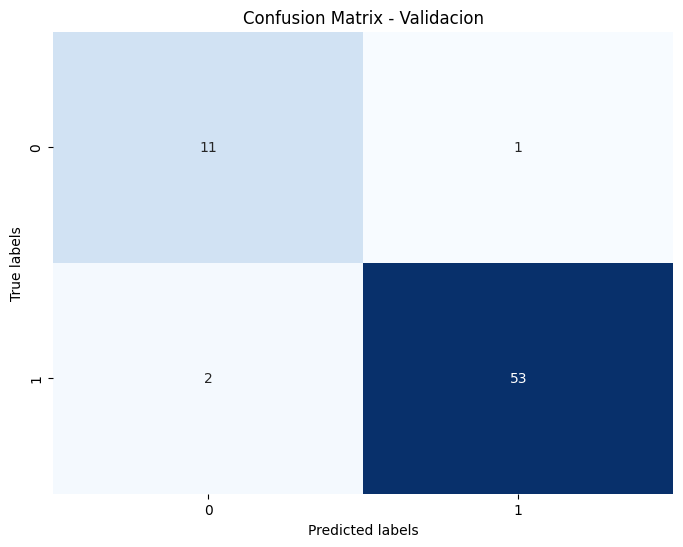

In [22]:
# Predecir en el conjunto de prueba
y_pred_val = gbm.predict(X_val)

# Calcular la matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_val, y_pred_val)

# Mostrar la matriz de confusión como un mapa de calor para el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Validacion')
plt.show()

# Sin aplicación del Oversampling

In [23]:
#Gradiente Boosting Classifier
gbm2 = GradientBoostingClassifier(n_estimators=5, learning_rate=0.1, random_state=42)
gbm2.fit(X_train, y_train) #Fit es para ajustar el modelo 
#Se realiza con el reducido y el y train, solo se reduce en X no en Y.


GradientBoostingClassifier(n_estimators=5, random_state=42)

In [24]:
# Predecir en el conjunto de prueba
y_pred2 = gbm2.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred2)
report = classification_report(y_test, y_pred2)

print("Gradient Boosting Machines Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}\n")

Gradient Boosting Machines Model Evaluation on Test Set:
Accuracy: 0.9555555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.94      0.97        34

    accuracy                           0.96        45
   macro avg       0.92      0.97      0.94        45
weighted avg       0.96      0.96      0.96        45




c:\Users\jquinteros\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


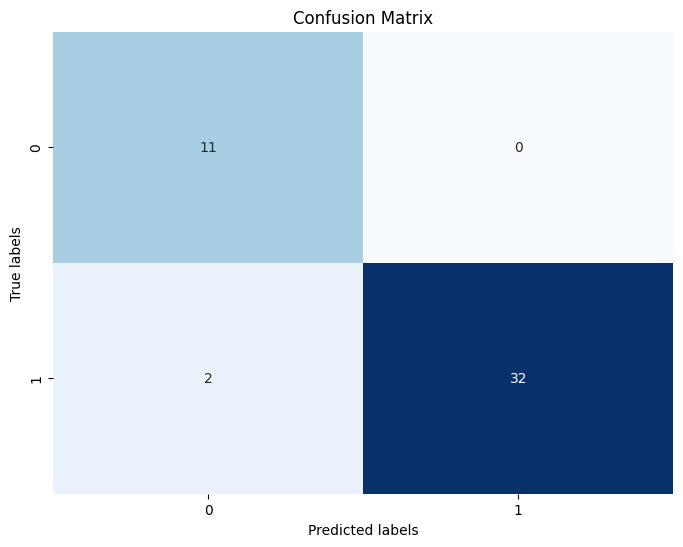

In [25]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred2)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Conclusiones:
El oversampling no afecta al modelo ya que se realizo las pruebas con y sin oversampling y no cambia
Tiene un buen rendimiento donde se equivoca en la clasificacion de 2 elementos maliciosos donde dice que no son maliciosos pero si son.
